# 텍스트 벡터화 & tf-idf

---
## 1️⃣ 텍스트 벡터화란?

### 💡 정의

> “텍스트 데이터를 숫자 벡터(배열)로 바꾸는 과정”

- 컴퓨터는 **문자**를 이해하지 못하기 때문에, 문장을 **숫자로 바꿔주는 과정**이 필요합니다.
    
- 예를 들어,
    
    ```
    문장 1: 나는 커피를 좋아한다
    문장 2: 나는 차를 좋아한다
    
    ```
    
    이 두 문장을 컴퓨터가 이해하려면 단어별로 숫자화해야 합니다.

➡️ 단순하지만 빠르고, 기초적인 **텍스트 표현의 출발점**이에요.
➡️ 이렇게 단어 빈도를 기반으로 만드는 방법을 **CountVectorizer** 라고 부릅니다.

### 🔍 원리

- 문서 전체에서 단어별로 **등장 횟수(count)** 를 계산
  
- 모든 단어를 열(column)로 만들고,    
    각 문서마다 몇 번 나왔는지 숫자로 표시합니다.   

| 문서  | 나는  | 커피  | 차   | 좋아한다 |
| --- | --- | --- | --- | ---- |
| 문서1 | 1   | 1   | 0   | 1    |
| 문서2 | 1   | 0   | 1   | 1    |

➡️ 이런 구조가 바로 **문서-단어 행렬(Document-Term Matrix, DTM)** 입니다.
➡️ 문서 수가 많아질수록, 이 행렬의 크기도 커집니다.

### ✅ 장점

- 구현이 간단하고 빠름
- 머신러닝 모델에 바로 적용 가능

### ⚠️ 단점

- 단어의 **순서**와 **의미**는 고려하지 않음
- 자주 등장하는 “은/는/이/가” 같은 단어도 동일하게 중요하게 다룸
- 예: “좋다”와 “별로다”를 단순히 숫자로만 구분

In [4]:
# 간단한 예시 문장 4개
docs = [
    "나는 커피를 좋아한다",
    "나는 차를 좋아한다",
    "커피는 맛있다",
    "차는 향기롭다"
]

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


# 1. 벡터라이저 생성
cv = CountVectorizer()

# 2. 문장들을 숫자로 변환 (문서-단어 행렬)
X = cv.fit_transform(docs)

# 3. 단어 목록(어휘집) 확인
print("단어 목록:", cv.get_feature_names_out())

# 4. 문서-단어 행렬 확인
print("문서-단어 행렬:\n", X.toarray())

단어 목록: ['나는' '맛있다' '좋아한다' '차는' '차를' '커피는' '커피를' '향기롭다']
문서-단어 행렬:
 [[1 0 1 0 0 0 1 0]
 [1 0 1 0 1 0 0 0]
 [0 1 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 1]]


---
## 2️⃣ TF-IDF (가중치 기반 벡터화)

CountVectorizer는 단어의 **등장 횟수**만 세지만,
TF-IDF는 단어의 “중요도”까지 반영합니다.

### 📘 개념 한눈에 보기

|구성요소|뜻|역할|
|---|---|---|
|**TF (Term Frequency)**|한 문서 안에서 단어가 몇 번 등장했는가|“이 문서에서 얼마나 자주 나왔나”|
|**IDF (Inverse Document Frequency)**|전체 문서 중 몇 개 문서에 이 단어가 포함됐는가|“모든 문서에 흔한 단어는 중요하지 않다”|



### 📗 계산 아이디어 (쉽게 설명)

- TF: “이 문서 안에서 많이 나온 단어일수록 중요하다.”
- IDF: “다른 문서에서도 흔한 단어라면 덜 중요하다.”
- TF-IDF = TF × IDF
    - 문서 내 자주 등장하면서
    - 전체 문서에서는 드문 단어의 **가중치**를 높임

In [9]:
# 1. TF-IDF 벡터라이저 생성
tv = TfidfVectorizer()

# 2. 문장 → TF-IDF 행렬로 변환
X_tfidf = tv.fit_transform(docs)

# 3. 단어 목록 확인
print("단어 목록:", tv.get_feature_names_out())

# 4. TF-IDF 행렬 확인 (소수점 가중치)
print("TF-IDF 행렬:\n", np.round(X_tfidf.toarray(), 2))

단어 목록: ['나는' '맛있다' '좋아한다' '차는' '차를' '커피는' '커피를' '향기롭다']
TF-IDF 행렬:
 [[0.53 0.   0.53 0.   0.   0.   0.67 0.  ]
 [0.53 0.   0.53 0.   0.67 0.   0.   0.  ]
 [0.   0.71 0.   0.   0.   0.71 0.   0.  ]
 [0.   0.   0.   0.71 0.   0.   0.   0.71]]


## **추가실습**
## n-gram이란?

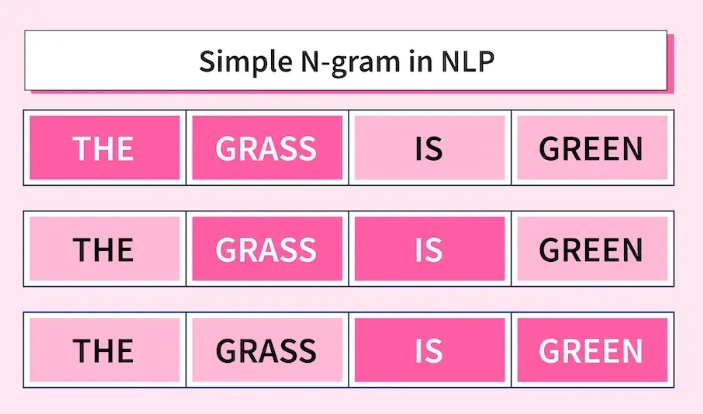

- **n-gram**은 텍스트에서 **연속된 n개의 단어 묶음(sequence of n words)** 을 말합니다.
- 즉, “한 단어”만 볼 수도 있고, “두 단어씩 묶음”으로 볼 수도 있습니다.

| 구분 | 예시 문장 | 추출 단위 | 결과 |
| --- | --- | --- | --- |
| **unigram (1-gram)** | "오늘 날씨 좋다" | 단어 1개씩 | ["오늘", "날씨", "좋다"] |
| **bigram (2-gram)** | "오늘 날씨 좋다" | 단어 2개씩 | ["오늘 날씨", "날씨 좋다"] |
| **trigram (3-gram)** | "오늘 날씨 좋다" | 단어 3개씩 | ["오늘 날씨 좋다"] |

In [10]:
docs = [
    "나는 커피를 좋아한다",
    "나는 차를 좋아한다",
    "커피는 맛있다",
    "차는 향기롭다",
    "나는 밀크티가 정말 정말 좋다",
    "녹차는 쓰다",
    "밀크티는 달다",
    "캐모마일의 향을 맡으면 진정이 된다"
]

In [ ]:
# 1. 벡터라이저 생성
# ngram_range=(1,2) 단어 묶음
# min_df = 최소빈도
cv = CountVectorizer(ngram_range=(1,2), min_df=2)

# 2. 문장들을 숫자로 변환 (문서-단어 행렬)
X = cv.fit_transform(docs)

# 3. 단어 목록(어휘집) 확인
print("단어 목록:", cv.get_feature_names_out())

# 4. 문서-단어 행렬 확인
print("문서-단어 행렬:\n", X.toarray())

단어 목록: ['나는' '나는 밀크티가' '나는 차를' '나는 커피를' '녹차는' '녹차는 쓰다' '달다' '된다' '맛있다' '맡으면'
 '맡으면 진정이' '밀크티가' '밀크티가 정말' '밀크티는' '밀크티는 달다' '쓰다' '정말' '정말 정말' '정말 좋다'
 '좋다' '좋아한다' '진정이' '진정이 된다' '차는' '차는 향기롭다' '차를' '차를 좋아한다' '캐모마일의'
 '캐모마일의 향을' '커피는' '커피는 맛있다' '커피를' '커피를 좋아한다' '향기롭다' '향을' '향을 맡으면']
문서-단어 행렬:
 [[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1]]


In [18]:
# 1. TF-IDF 벡터라이저 생성
tv = TfidfVectorizer(ngram_range=(1,2), min_df=2)

# 2. 문장 → TF-IDF 행렬로 변환
X_tfidf = tv.fit_transform(docs)

# 3. 단어 목록 확인
print("단어 목록:", tv.get_feature_names_out())

# 4. TF-IDF 행렬 확인 (소수점 가중치)
print("TF-IDF 행렬:\n", np.round(X_tfidf.toarray(), 2))

단어 목록: ['나는' '좋아한다']
TF-IDF 행렬:
 [[0.65 0.76]
 [0.65 0.76]
 [0.   0.  ]
 [0.   0.  ]
 [1.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]]
